In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('studeval.csv',sep=',')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there are no missing values

In [7]:
df.duplicated().sum()

0

there are no duplicates

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


all means are very close to each other
all standard deviations are also close
min score for math is 0 while for reading its 17 and for writing its 10

In [9]:
df.head(
)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [11]:
num_feat=[feat for feat in df.columns if df[feat].dtype!='O']
cat_feat=[feat for feat in df.columns if df[feat].dtype=='O']

In [12]:
print(f"we have {len(num_feat)} numerical features : {num_feat}")
print(f"we have {len(cat_feat)} categorical features : {cat_feat}")

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


combinig tables to form total score and average score

In [13]:
df['total_score']= df['math_score']+df['reading_score']+df['writing_score']
df['average_score']= df['total_score']/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_score=df[df['reading_score']==100]['average_score'].count()
writing_score=df[df['writing_score']==100]['average_score'].count()
math_score=df[df['math_score']==100]['average_score'].count()
print(f"number of students with 100 in reading score : {reading_score}")
print(f"number of students with 100 in writing score : {writing_score}")
print(f"number of students with 100 in math score : {math_score}")

number of students with 100 in reading score : 17
number of students with 100 in writing score : 14
number of students with 100 in math score : 7


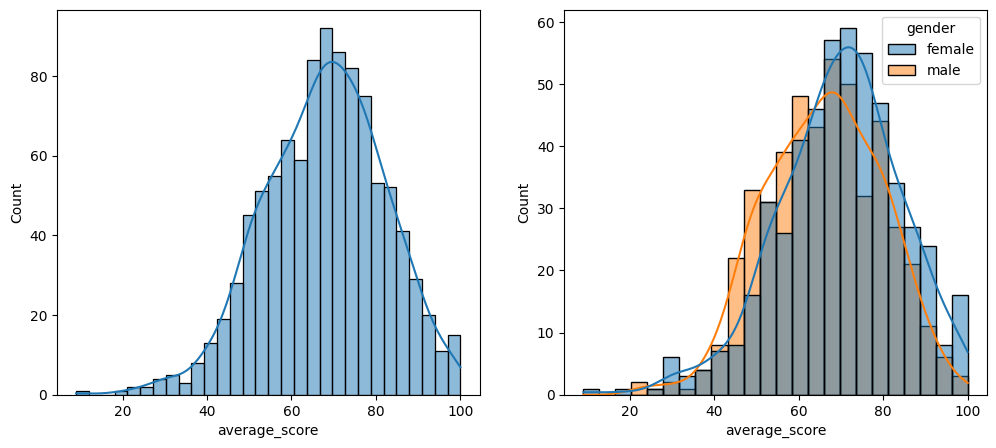

In [16]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

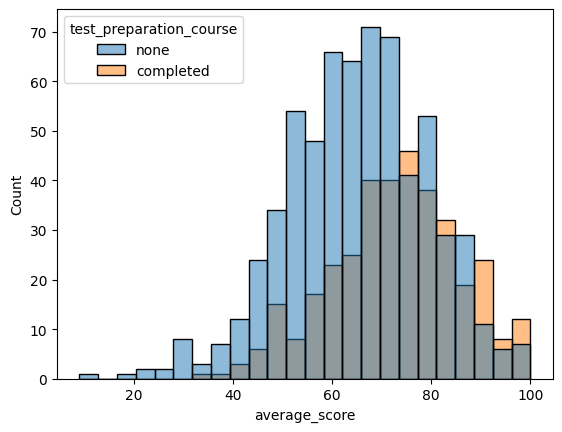

In [17]:
sns.histplot(data=df,x='average_score',hue='test_preparation_course')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15820\254063450.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15820\254063450.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15820\254063450.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


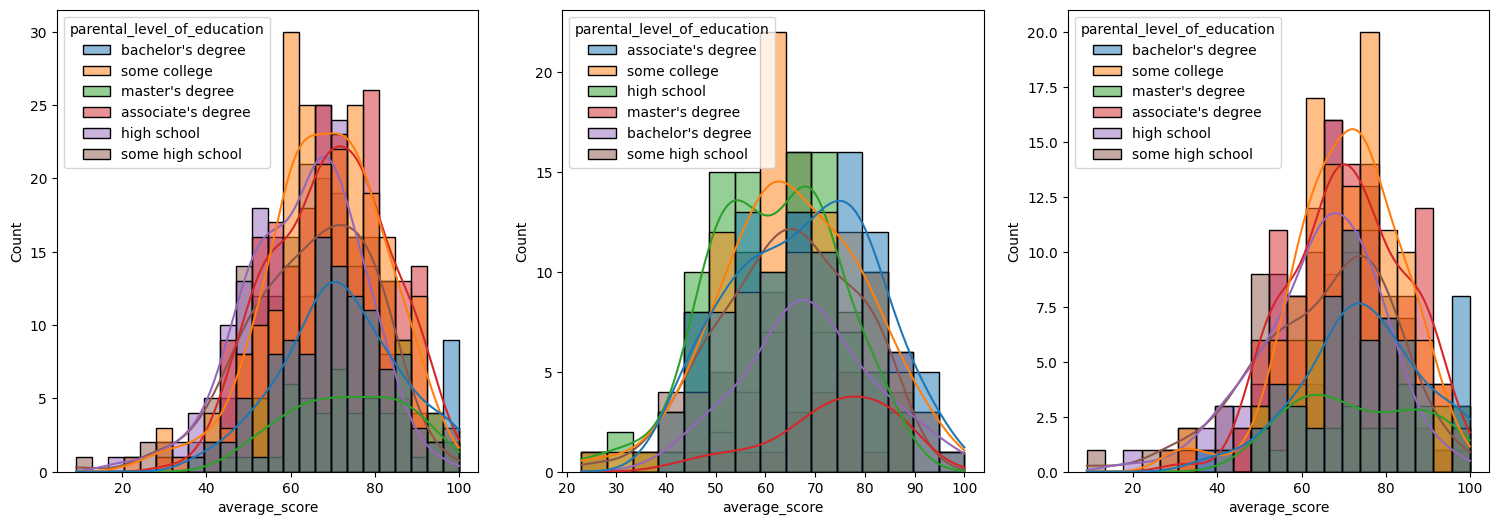

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


score distribution in all three subjects

In [22]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

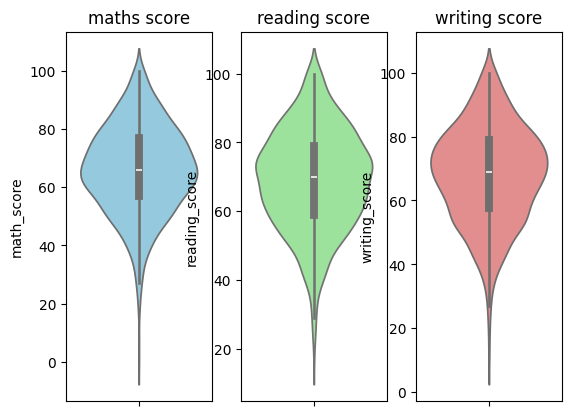

In [24]:
plt.subplot(1,3,1)
plt.title("maths score")
sns.violinplot(data=df,y='math_score',color='skyblue')
plt.subplot(1,3,2)
plt.title("reading score")
sns.violinplot(data=df,y='reading_score',color='lightgreen')
plt.subplot(1,3,3)
plt.title("writing score")
sns.violinplot(data=df,y='writing_score',color='lightcoral')
plt.show()

most of the score 60-80 marks in maths whereas in writing they sore between 50 and 75

([<matplotlib.patches.Wedge at 0x1a3aab673a0>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.9'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.2'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.0'),
  Text(0.32467274541824787, -0.5045667531482604, '14.0'),
  Text(0.5766992522671516, -0.1655837323969605, '8.9')])

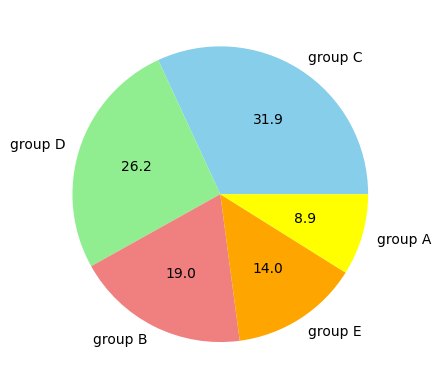

In [31]:
sizes=df['race_ethnicity'].value_counts()
sizes
labels=sizes.index
labels
plt.pie(sizes,labels=labels,autopct='%1.1f',colors=['skyblue','lightgreen','lightcoral','orange','yellow'])

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
